## PROJECT

### Observation

`Age` - The values of 'age' column is in unit of days. So, this will be changed to years for better understanding.

`Gender` - The values of 'gender' column are 1 and 2. In this, '1' is indicated as women and '2' as men. For better computation, the column name should be changed from 'gender' to 'male' and the values should be changed into 0 as women and 1 as men.

`Height` - The unit of height is in centimeter (cm). There are various incorrect values recorded in the dataset which cannot be considerd as height. So these outliers should be removed and only the normal human height of the patients should be considered. Those with abnormal small heights (risk of Achondroplasia or dwarfism) and tall heights (risk of atrial fibrillation) may have confirmed risk of cardiovascular diseases from an early stage of their life, which would affect the data analysis for the focused parameters.

`Weight` - The values of 'weight' column is in unit of kilogram (kg).

`BMI (Body-mass index)` - A column of bmi and bmi_class is required to better understand the healthy weight parameter of the patients in terms of their height. We use the parameters provided by The Canadian Diabetes Association (https://www.diabetes.ca/resources/tools---resources/body-mass-index-(bmi)-calculator#:~:text=The%20formula%20is%20BMI%20%3D%20kg,most%20adults%2018%2D65%20years.)

`Blood pressure (ap_hi / ap_lo)` - The unit of blood pressure can be assumed to be in mmHg. The minimum value of blood pressure is negative which is highly unlikely as normal blood pressure should be between 120/90mmHg (meaning Systolic pressure of 120mmHg and Diastolic pressure of 90mmHg). Blood pressure readings will be classified based on Medical News Today (https://www.medicalnewstoday.com/articles/327077).

`Cholesterol` - The cholesterol level are indicated as 1, 2 and 3, where 1 is normal, 2 is above normal and 3 is well above normal. For better computation, it should be changed into 0 as normal, 1 as above normal and 2 as well above normal.

`Glucose` - The glucose level are indicated as 1, 2 and 3, where 1 is normal, 2 is above normal and 3 is well above normal. For better computation, it should be changed into 0 as normal, 1 as above normal and 2 as well above normal.

`Smokin` - In the 'smoke' column, the value '0' means that the patient don't smokes and value '1' means that the patient smokes.

`Alcohol consumption` - In the 'alco' column, the value '0' means that the patient don't drink alcohol and value '1' means that the patient drink alcohol. The name of column should be changed into 'alcohol_intake' for better understanding.

`Physical activity` - In the 'active' column, the value '0' means that the patient is non-active and '1' means that the patient is active.

`The information about smoking, alcohol consumption and physical activity are subjective features which are given by the patients. These data may not be reliable but can provide a better insight of patient conditions.`

`Cardiovascular disease occurrence` - This is a target variable which provides the information about the presence or absence of cardiovascular disease. In the 'cardio' column, the value '0' means absence of cardiovascular disease and '1' means presence of cardiovascular disease. The name of this 'cardio' column should be changed into 'cvd' for better understanding. In this dataset, near about half of the subjects have cardiovascular diseases.

In [45]:
#Import Libraries
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mutual_info_score
from sklearn.linear_model import RidgeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve

import re

import xgboost as xgb

In [46]:
df = pd.read_csv("C:/Users/Co/Desktop/ML Project DataKlub/cardio_train.csv", sep=';')

In [47]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [48]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [49]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [51]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [52]:
# df.describe()

In [53]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [54]:
df.rename(columns={"gluc":"glucose", "alco":"alcohol_consumption", "cardio":"cardio_status"}, inplace=True)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,smoke,alcohol_consumption,active,cardio_status
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [55]:
# Discarding blood pressure greater than 370/360 mmHg and blood pressure less than 50/20mmHg respectively
df = df.loc[(df["ap_hi"] > 50) & (df["ap_hi"] < 370) & (df["ap_lo"] > 20) & (df["ap_lo"] < 360)]
df.reset_index(inplace=True)

In [56]:
df.shape

(68781, 14)

In [57]:
# function for blood pressure classification
def pressure_label(row):
    if row['ap_hi'] < 90 and row['ap_lo'] < 60:
        return 'Low Blood Pressure'
    elif row['ap_hi'] < 120 and row['ap_lo'] < 80:
        return "Normal Blood Pressure"
    elif row['ap_hi'] < 130 and row['ap_lo'] < 80:
        return "Elevated Blood Pressure"
    elif row['ap_hi'] < 140 and row['ap_lo'] < 90:
        return "High BP Stage 1"
    else:
        return "High BP Stage 2"
   

In [58]:
df['blood_pressure'] = df.apply(pressure_label, axis=1)

In [59]:
df['blood_pressure'].value_counts()

High BP Stage 1            32460
High BP Stage 2            23652
Normal Blood Pressure       9542
Elevated Blood Pressure     3113
Low Blood Pressure            14
Name: blood_pressure, dtype: int64

In [60]:
# df

In [61]:
## change days to years in age column
df["age"] = df["age"].apply(lambda x: round(x/365))

In [62]:
# Reference from the The Canadian Diabetes Association says that:
# Body Mass Index is a simple calculation using a person’s height and weight. 
# The formula is BMI = kg/m2 where kg is a person’s weight in kilograms and m2 is their height in metres squared.
# A BMI of 25.0 or more is overweight, while the healthy range is 18.5 to 24.9. BMI applies to most adults 18-65 years.

df["bmi"] = df["weight"] *10000 / ((df["height"])**2)
df['bmi_class'] = df['bmi'].apply(lambda x : x < 25)
df['bmi_class']

0         True
1        False
2         True
3        False
4         True
         ...  
68776    False
68777    False
68778    False
68779    False
68780     True
Name: bmi_class, Length: 68781, dtype: bool

In [63]:
df.dtypes

index                    int64
id                       int64
age                      int64
gender                   int64
height                   int64
weight                 float64
ap_hi                    int64
ap_lo                    int64
cholesterol              int64
glucose                  int64
smoke                    int64
alcohol_consumption      int64
active                   int64
cardio_status            int64
blood_pressure          object
bmi                    float64
bmi_class                 bool
dtype: object

In [64]:
## let's drop the id column which won't contribute to the model using domain knowldedge.
df.drop(['id', 'index'], axis=1, inplace=True)

In [65]:
## convert 
df[['weight', 'bmi_class']] = df[['weight', 'bmi_class']] .astype('int64')

In [66]:
# data variables are object ar boolean

cat_cols = list(df.dtypes[df.dtypes == 'object'].index)
print(f'Columns with categorical variables are: {cat_cols} \n')


int_cols = list(df.dtypes[df.dtypes == 'int64'].index)
print(f'Columns with integer values are: {int_cols}')

Columns with categorical variables are: ['blood_pressure'] 

Columns with integer values are: ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'glucose', 'smoke', 'alcohol_consumption', 'active', 'cardio_status', 'bmi_class']


In [67]:
# int_cols = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'glucose', 'smoke', 'alcohol_consumption', 'active', 'bmi_class', 'cardio_status']
# df = df[int_cols]

In [68]:
## for better computation, replace 1 with 0, 2 with 1, 3 with 2
df[['gender', 'glucose', 'cholesterol']] = df[['gender', 'glucose', 'cholesterol']].apply(lambda x : x-1)

In [69]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'glucose', 'smoke', 'alcohol_consumption', 'active', 'cardio_status',
       'blood_pressure', 'bmi', 'bmi_class'],
      dtype='object')

In [71]:
select = ['gender', 'glucose', 'cholesterol', 'smoke', 'alcohol_consumption', 'active', 'bmi_class', 'blood_pressure', 'cardio_status']
df_select = df[select]

for col in df_select.columns:
    gra = df_select[col].value_counts()
    print(f'{col.upper()}: \n')
    print(gra)
    print('\n')
    

GENDER: 

0    44795
1    23986
Name: gender, dtype: int64


GLUCOSE: 

0    58472
2     5235
1     5074
Name: glucose, dtype: int64


CHOLESTEROL: 

0    51581
1     9314
2     7886
Name: cholesterol, dtype: int64


SMOKE: 

0    62728
1     6053
Name: smoke, dtype: int64


ALCOHOL_CONSUMPTION: 

0    65092
1     3689
Name: alcohol_consumption, dtype: int64


ACTIVE: 

1    55257
0    13524
Name: active, dtype: int64


BMI_CLASS: 

0    42805
1    25976
Name: bmi_class, dtype: int64


BLOOD_PRESSURE: 

High BP Stage 1            32460
High BP Stage 2            23652
Normal Blood Pressure       9542
Elevated Blood Pressure     3113
Low Blood Pressure            14
Name: blood_pressure, dtype: int64


CARDIO_STATUS: 

0    34741
1    34040
Name: cardio_status, dtype: int64




In [72]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,smoke,alcohol_consumption,active,cardio_status,bmi,bmi_class
count,68781.000000,68781.000000,68781.000000,68781.000000,68781.000000,68781.000000,68781.000000,68781.000000,68781.000000,68781.000000,68781.000000,68781.000000,68781.000000,68781.000000
mean,53.326820,0.348730,164.361684,74.121662,126.615286,81.377561,0.364723,0.225993,0.088004,0.053634,0.803376,0.494904,27.523017,0.377662
std,6.767516,0.476572,8.185009,14.331393,16.763540,9.688359,0.678980,0.571968,0.283303,0.225296,0.397449,0.499978,6.050164,0.484806
min,30.000000,0.000000,55.000000,11.000000,60.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.471784,0.000000
25%,48.000000,0.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,23.875115,0.000000
50%,54.000000,0.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,26.346494,0.000000
75%,58.000000,1.000000,170.000000,82.000000,140.000000,90.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,30.119376,1.000000
max,65.000000,1.000000,250.000000,200.000000,240.000000,190.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,298.666667,1.000000


## Data Exploration

### Age

In [81]:
print(df.age.value_counts())
# print('')
# plt.figure(figsize=(12, 8))
# df.age.value_counts().plot(kind='bar')
# plt.xticks(rotation=45)
# plt.title('Age Distribution', size=20)
# plt.show()

56    6031
54    5988
58    5702
60    5465
52    5303
50    5267
62    3926
64    3920
48    3194
46    2955
44    2837
40    2700
42    2624
55    1498
57    1452
53    1407
59    1355
51    1348
61    1221
49    1059
63    1016
41     766
45     757
47     754
43     690
39     409
65     352
30       4
Name: age, dtype: int64


#### `For truer data visualization of age distribution, we group the ages in range of 10 years against occurence of cardiovascular disease`

                age  cardio_status
age                               
(30, 40]  39.869268       0.225691
(40, 50]  46.410781       0.386672
(50, 60]  55.807311       0.526099
(60, 70]  62.832339       0.687372
 


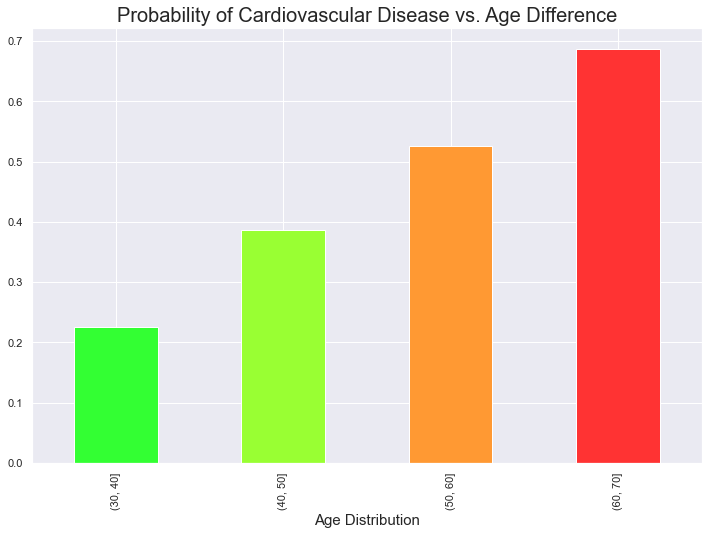

In [73]:
colors = ["#33ff33", "#99ff33", "#ff9933", "#ff3333"]

plt.figure(figsize=(12, 8))
df1=df[['age','cardio_status']]
bins =  np.arange(30,80,10)
groups = df1.groupby(pd.cut(df1['age'],bins)).mean()
print(groups.head())
print(" ")
groups['cardio_status'].plot(kind="bar", color = colors)
plt.title("Probability of Cardiovascular Disease vs. Age Difference", size=20)
plt.xlabel('Age Distribution', size=15)
plt.show()

#### `OBSERVATION: The higher the Age Difference, the higher the possibility of having a cardiovascular disease`

### Body Mass Index

In [74]:
# print(df.age.value_counts())

bmi_class   cardio_status
Healthy     0                0.605366
            1                0.394634
Overweight  1                0.555753
            0                0.444247
Name: cardio_status, dtype: float64



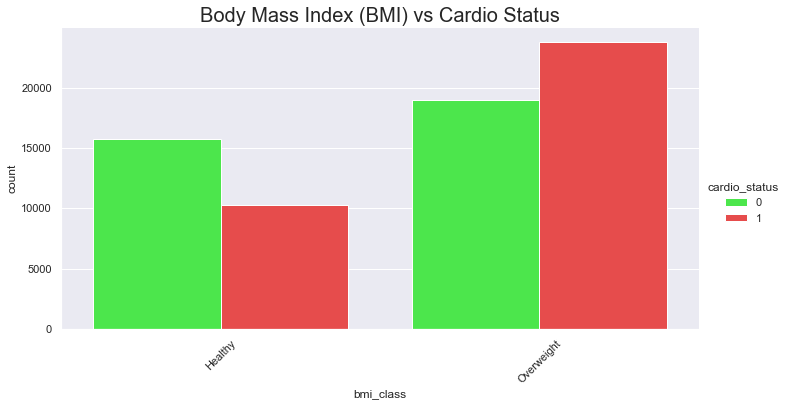

In [75]:
colors = ["#33ff33", "#ff3333"]
sns.set_palette(colors)

df_bmi_class = df[['bmi_class', 'cardio_status']]
df_bmi_class['bmi_class'].replace({0: "Overweight", 1: "Healthy"}, inplace=True)

print(df_bmi_class.groupby('bmi_class')['cardio_status'].value_counts(normalize=True))
print('')

sns.catplot(x='bmi_class',kind='count', hue='cardio_status', data=df_bmi_class, height=5, aspect=2)
# plt.ylabel('')
plt.xticks(rotation=45)
plt.title('Body Mass Index (BMI) vs Cardio Status', size=20)
plt.show()

`OBSERVATION: Patients who are overweight (i.e. BMI > 25) have higher tendencies of having a cardiovascular disease`

### Blood Pressure

blood_pressure           cardio_status
Elevated Blood Pressure  0                0.677160
                         1                0.322840
High BP Stage 1          0                0.615465
                         1                0.384535
High BP Stage 2          1                0.779469
                         0                0.220531
Low Blood Pressure       0                0.928571
                         1                0.071429
Normal Blood Pressure    0                0.778244
                         1                0.221756
Name: cardio_status, dtype: float64



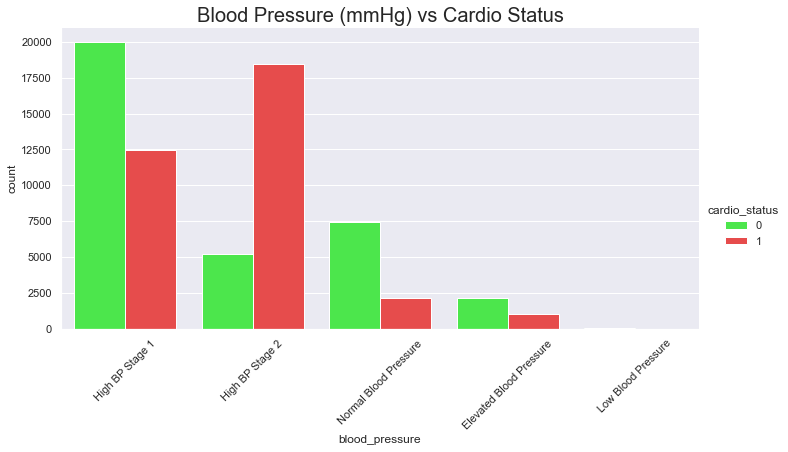

In [78]:
colors = ["#33ff33", "#ff3333"]
sns.set_palette(colors)

df_bp = df[['blood_pressure', 'cardio_status']]
df_bp['blood_pressure'].replace({0: "Overweight", 1: "Healthy"}, inplace=True)

print(df_bp.groupby('blood_pressure')['cardio_status'].value_counts(normalize=True))
print('')

sns.catplot(x='blood_pressure',kind='count', hue='cardio_status', data=df_bp, height=5, aspect=2)
# plt.ylabel('')
plt.xticks(rotation=45)
plt.title('Blood Pressure (mmHg) vs Cardio Status', size=20)
plt.show()

`OBSERVATION: Patients with Stage 1 and Stage 1 high blood pressure reading have higher chance of having a cardiovascular disease`

### Gender

gender  cardio_status
Female  0                0.507735
        1                0.492265
Male    0                0.500167
        1                0.499833
Name: cardio_status, dtype: float64



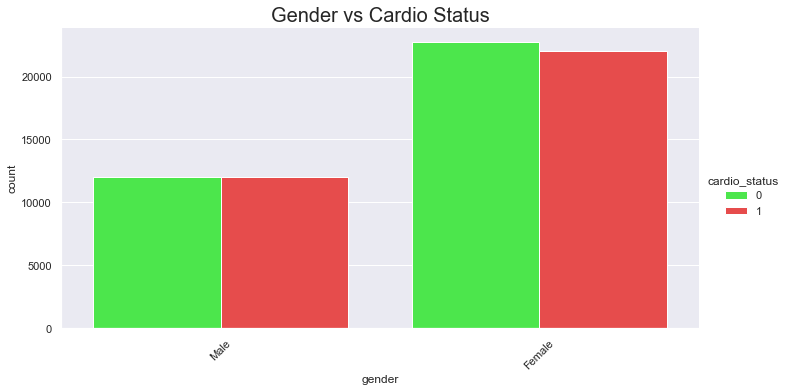

In [79]:
colors = ["#33ff33", "#ff3333"]
sns.set_palette(colors)

df_gender = df[['gender', 'cardio_status']]
df_gender['gender'].replace({0: "Female", 1: "Male"}, inplace=True)

print(df_gender.groupby('gender')['cardio_status'].value_counts(normalize=True))
print('')

sns.catplot(x='gender',kind='count', hue='cardio_status', data=df_gender, height=5, aspect=2)
# plt.ylabel('')
plt.xticks(rotation=45)
plt.title('Gender vs Cardio Status', size=20)
plt.show()

#### `OBSERVATION: Similar tendencies observed`

### Glucose Level

glucose            cardio_status
Above Normal       1                0.588687
                   0                0.411313
Normal             0                0.524319
                   1                0.475681
Well Above Normal  1                0.618720
                   0                0.381280
Name: cardio_status, dtype: float64



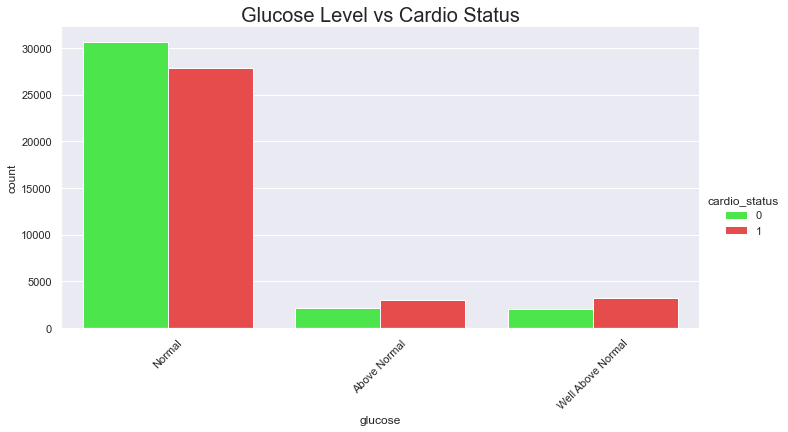

In [80]:
colors = ["#33ff33", "#ff3333"]
sns.set_palette(colors)

df_glu = df[['glucose', 'cardio_status']]
df_glu['glucose'].replace({0: "Normal", 1: "Above Normal", 2: "Well Above Normal"}, inplace=True)

print(df_glu.groupby('glucose')['cardio_status'].value_counts(normalize=True))
print('')

sns.catplot(x='glucose',kind='count', hue='cardio_status', data=df_glu, height=5, aspect=2)
# plt.ylabel('')
plt.xticks(rotation=45)
plt.title('Glucose Level vs Cardio Status', size=20)
plt.show()

#### `OBSERVATION: Higher Glucose Level shows slight higher tendency for cardiovascular disease`

### Cholesterol Level

cholesterol        cardio_status
Above Normal       1                0.596414
                   0                0.403586
Normal             0                0.564394
                   1                0.435606
Well Above Normal  1                0.762871
                   0                0.237129
Name: cardio_status, dtype: float64



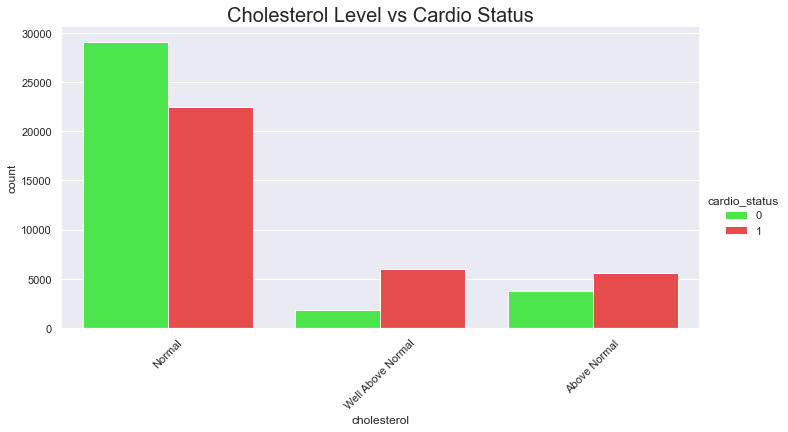

In [81]:
colors = ["#33ff33", "#ff3333"]
sns.set_palette(colors)

df_chol = df[['cholesterol', 'cardio_status']]
df_chol['cholesterol'].replace({0: "Normal", 1: "Above Normal", 2: "Well Above Normal"}, inplace=True)

print(df_chol.groupby('cholesterol')['cardio_status'].value_counts(normalize=True))
print('')

sns.catplot(x='cholesterol',kind='count', hue='cardio_status', data=df_chol, height=5, aspect=2)
# plt.ylabel('')
plt.xticks(rotation=45)
plt.title('Cholesterol Level vs Cardio Status', size=20)
plt.show()

#### `OBSERVATION: Higher Cholesterol Level shows slight higher tendency for cardiovascular disease`

### Smoking

smoke        cardio_status
Do Smoke     0                0.531307
             1                0.468693
Don't Smoke  0                0.502567
             1                0.497433
Name: cardio_status, dtype: float64



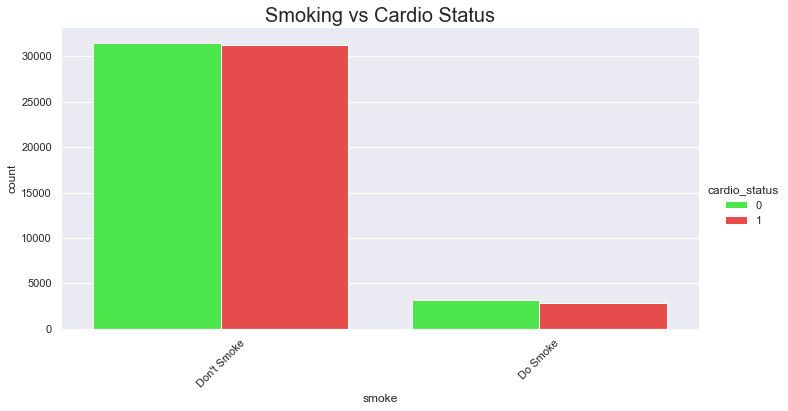

In [82]:
colors = ["#33ff33", "#ff3333"]
sns.set_palette(colors)

df_sm = df[['smoke', 'cardio_status']]
df_sm['smoke'].replace({0: "Don't Smoke", 1: "Do Smoke"}, inplace=True)

print(df_sm.groupby('smoke')['cardio_status'].value_counts(normalize=True))
print('')

sns.catplot(x='smoke',kind='count', hue='cardio_status', data=df_sm, height=5, aspect=2)
# plt.ylabel('')
plt.xticks(rotation=45)
plt.title('Smoking vs Cardio Status', size=20)
plt.show()

`OBSERVATION: Surprisingly, no visible difference`

### Alcohol Consumption

alcohol_consumption  cardio_status
Do Drink             0                0.522364
                     1                0.477636
Don't Drink          0                0.504117
                     1                0.495883
Name: cardio_status, dtype: float64



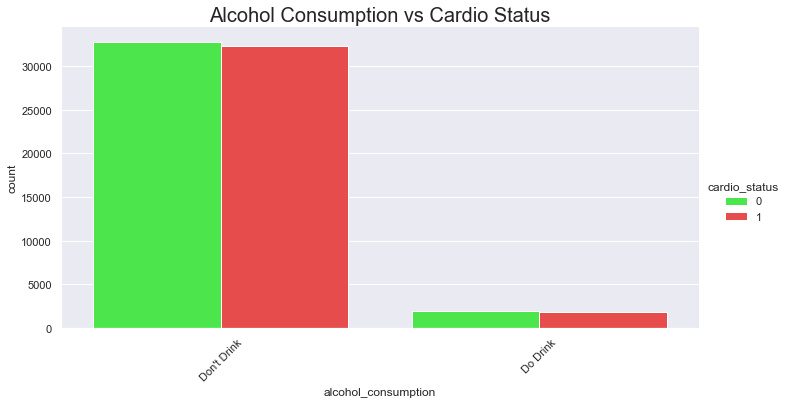

In [83]:
colors = ["#33ff33", "#ff3333"]
sns.set_palette(colors)

df_al = df[['alcohol_consumption', 'cardio_status']]
df_al['alcohol_consumption'].replace({0: "Don't Drink", 1: "Do Drink"}, inplace=True)

print(df_al.groupby('alcohol_consumption')['cardio_status'].value_counts(normalize=True))
print('')

sns.catplot(x='alcohol_consumption',kind='count', hue='cardio_status', data=df_al, height=5, aspect=2)
# plt.ylabel('')
plt.xticks(rotation=45)
plt.title('Alcohol Consumption vs Cardio Status', size=20)
plt.show()

`OBSERVATION: Surprisingly, no visible difference`

### Physical Activity

active  cardio_status
0       1                0.532535
        0                0.467465
1       0                0.514306
        1                0.485694
Name: cardio_status, dtype: float64



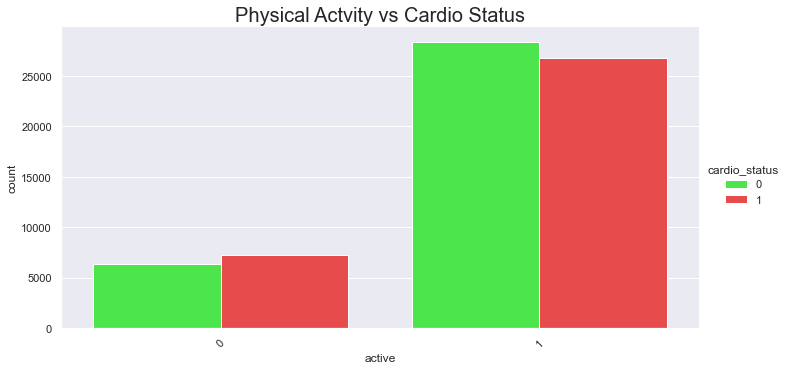

In [86]:
colors = ["#33ff33", "#ff3333"]
sns.set_palette(colors)

df_ac = df[['active', 'cardio_status']]
# df_ac['active''].replace({0: "Don't Drink", 1: "Do Drink"}, inplace=True)

print(df_ac.groupby('active')['cardio_status'].value_counts(normalize=True))
print('')

sns.catplot(x='active',kind='count', hue='cardio_status', data=df_ac, height=5, aspect=2)
# plt.ylabel('')
plt.xticks(rotation=45)
plt.title('Physical Actvity vs Cardio Status', size=20)
plt.show()

`OBSERVATION: Non-active patients have a slight chance of having a cardiovascular disease but much cannot be inferred between active and non-active patients`

In [90]:
df = df[['age', 'gender', 'cholesterol','glucose', 'smoke', 'alcohol_consumption', 'active', 'blood_pressure', 'bmi_class', 'cardio_status']]

In [92]:
df.head(3)

,age,gender,cholesterol,glucose,smoke,alcohol_consumption,active,blood_pressure,bmi_class,cardio_status
0,50,1,0,0,0,0,1,High BP Stage 1,1,0
1,55,0,2,0,0,0,1,High BP Stage 2,0,1
2,52,0,2,0,0,0,0,High BP Stage 1,1,1


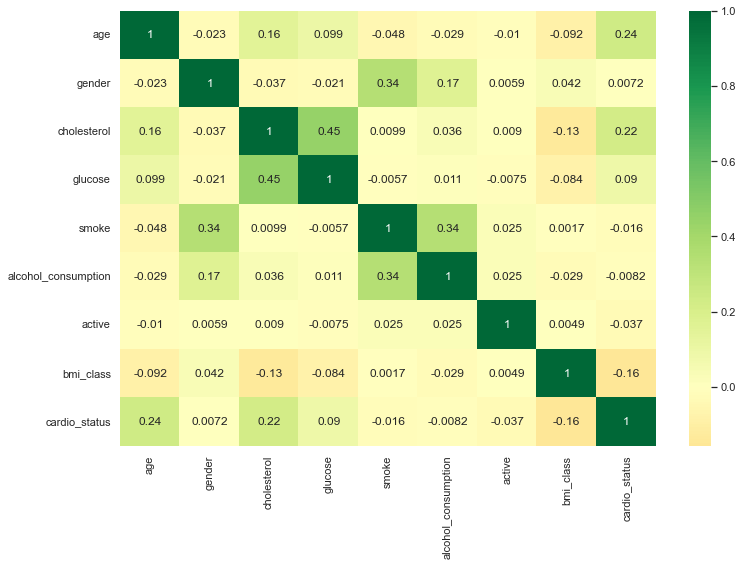

In [93]:
# Let's check the multicollinearity of features by checking the correlation matric

plt.figure(figsize=(12,8))
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',center=0) 